# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Inteligência Artificial Aplicada a Finanças</font>

## <font color='blue'>Projeto 1 - Parte 1</font>
### <font color='blue'>Analisando Tendências no Valor de Títulos Públicos do Tesouro Direto ao Longo do Tempo</font>

![title](imagens/P1.png)

O Projeto está dividido em 5 partes e vamos estudar em detalhes o processo de análise de séries temporais, o que será fundamental para projetos mais avançados aqui no curso.

Leia os manuais em pdf disponibilizados ao longo do capítulo.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

statsmodels: 0.13.2
seaborn    : 0.11.2
numpy      : 1.21.5
pandas     : 1.4.2
matplotlib : 3.5.1



## Carregando e Explorando os Dados

O conjunto de dados fornece o valor de um título público negociado no Tesouro Direto ao longo do tempo, especificamente entre 2004 e 2015. Um valor que muda ao longo do tempo é chamado de série temporal.

In [6]:
# Carregando os dados
dados = pd.read_csv('dados/dataset.csv', header = None)

In [7]:
# Visualizando os Dados
dados.head()

,0,1
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


Perceba que são duas colunas. Esses dados representam uma série univariada, pois temos uma variável aleatória (valor do título público) e a data, que representa o índice da série. Veja que a série é mensal.

Vamos ajustar o nome de cada coluna.

In [8]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'valor_titulo']

In [9]:
# Visualizando os Dados
dados.head()

,mes,valor_titulo
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [10]:
# Resumo estatístico da variável valor_titulo. A média é de 280.
dados.describe()

,valor_titulo
count,144.00000
mean,280.31250
std,119.95369
min,104.00000
25%,180.00000
50%,265.50000
75%,360.50000
max,622.00000


In [11]:
# Qual será o mês com o título de maior valor?
dados.max()

mes             2015-12
valor_titulo        622
dtype: object

In [12]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 2004-01
Final do Período de Tempo: 2015-12


In [13]:
# Shape dos Dados
dados.shape

(144, 2)

In [14]:
# Tipos dos Dados
dados.dtypes

mes             object
valor_titulo     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.

In [15]:
# Tipo do objeto
type(dados)

pandas.core.frame.DataFrame

## Processamento e Visualização dos Dados

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [16]:
# Visualizando os Dados
dados.head()

,mes,valor_titulo
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [17]:
# Tipos dos Dados
dados.dtypes

mes             object
valor_titulo     int64
dtype: object

In [18]:
# Convertendo a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [19]:
# Visualizando os Dados
dados.head()

,mes,valor_titulo
0,2004-01-01,112
1,2004-02-01,118
2,2004-03-01,132
3,2004-04-01,129
4,2004-05-01,121


In [20]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [21]:
# Visualizando os Dados
dados_serie.head()

,valor_titulo
mes,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [22]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01', '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [23]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

valor_titulo    0
dtype: int64

> Plot da Série Temporal - Primeira Análise de Tendência

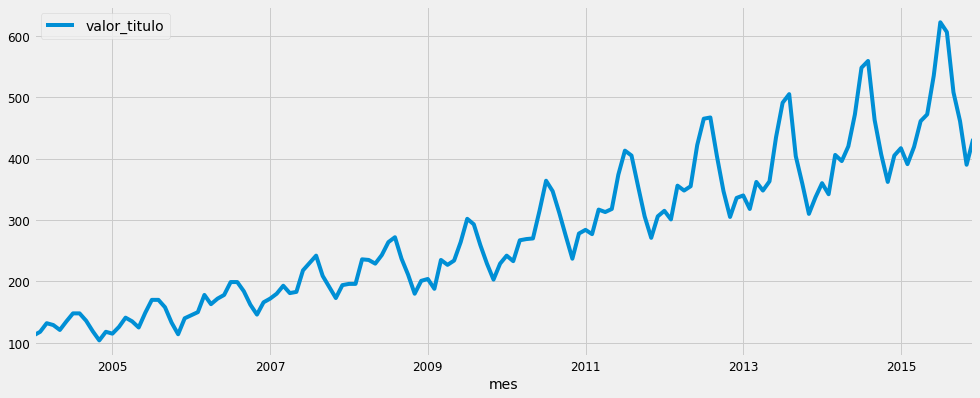

In [24]:
# Plot da Série Temporal - aqui já observamos algumas tendências.
dados_serie.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência. 

- Sazonalidade - o fenômeno se repete em períodos fixos.
- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Então, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.


> Gráfico de Densidade - Segunda Análise de Tendência

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico: 

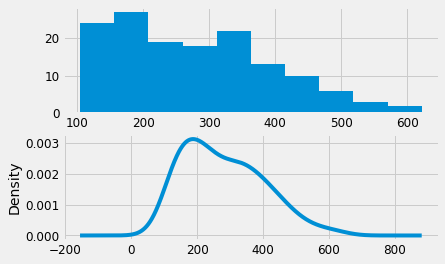

In [25]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.valor_titulo.hist()

# Subplot 2
plt.subplot(212)
dados_serie.valor_titulo.plot(kind = 'kde')
plt.show()

Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

> BoxPlots - Terceira Análise de Tendência

Vamos agora criar BoxPlots para cada ano da série.

Text(0, 0.5, '\nValor do Título')

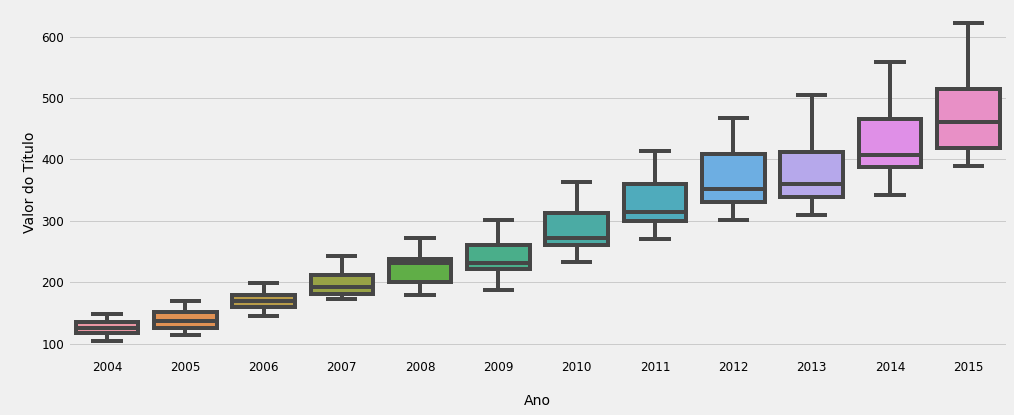

In [26]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis
indice_ano = dados_serie.valor_titulo.index.year
valor = dados_serie.valor_titulo

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = dados_serie)

plt.xlabel("\nAno")
plt.ylabel("\nValor do Título")

Análise:

- Valores medianos ao longo dos anos confirmam uma tendência ascendente.
- Aumento constante da dispersão do meio (mediana) dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

> Comparação Lado a Lado - Quarta Análise de Tendência

In [27]:
dados_serie.head()

,valor_titulo
mes,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


Como é uma série temporal mensal e segue um determinado padrão repetitivo todos os anos, você pode plotar cada ano como uma linha separada no mesmo gráfico. Isso permite comparar os padrões do ano lado a lado.

Vamos fazer isso? Então execute a célula abaixo.

Observe que estamos usando agora o dataset "dados" e não "dados_serie". Por que? Porque precisamos da data como uma coluna de texto e não como índice, para criar o gráfico abaixo.

In [28]:
dados.head()

,mes,valor_titulo
0,2004-01-01,112
1,2004-02-01,118
2,2004-03-01,132
3,2004-04-01,129
4,2004-05-01,121


In [29]:
# Prepara os dados
x = dados['mes'].values
y1 = dados['valor_titulo'].values

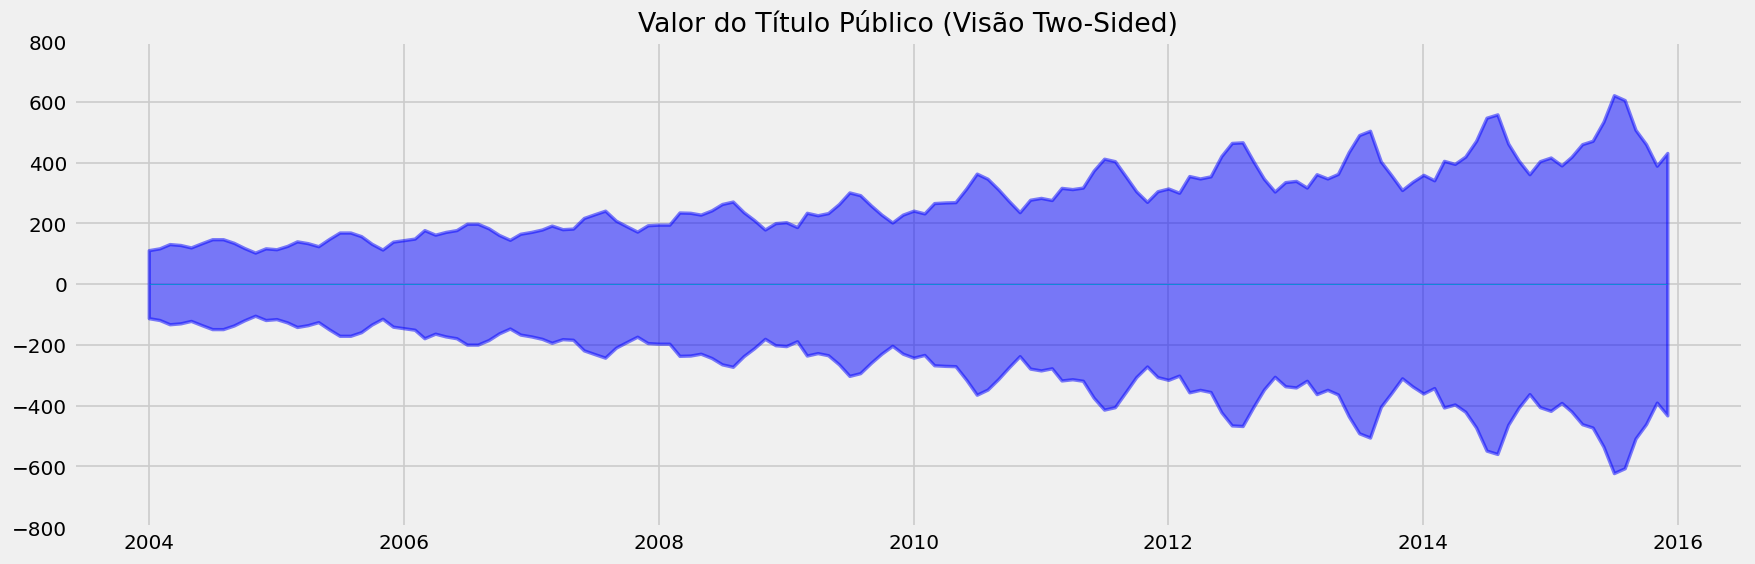

In [30]:
# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16,5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')

# Limites do eixo y
plt.ylim(-800, 800)

# Título
plt.title('Valor do Título Público (Visão Two-Sided)', fontsize = 16)

# Limite das linhas
plt.hlines(y = 0, xmin = np.min(dados.mes), xmax = np.max(dados.mes), linewidth = .5)

# Mostra o gráfico
plt.show()

Análise:

- O gráfico mostra a linha de cada ano, todas juntas. Observamos que padrão é muito parecido em todos os anos.
- Mas a única forma de ter certeza sobre o padrão dos dados ao longo do tempo é decompor a série e então analisar seus componentes de forma individual.

Leia os manuais em pdf na sequência.

## Visualizando a Decomposição da Série Temporal

Vamos então decompor nossa série temporal.

In [31]:
# Decomposição Multiplicativa
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie, 
                                                        model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

In [32]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

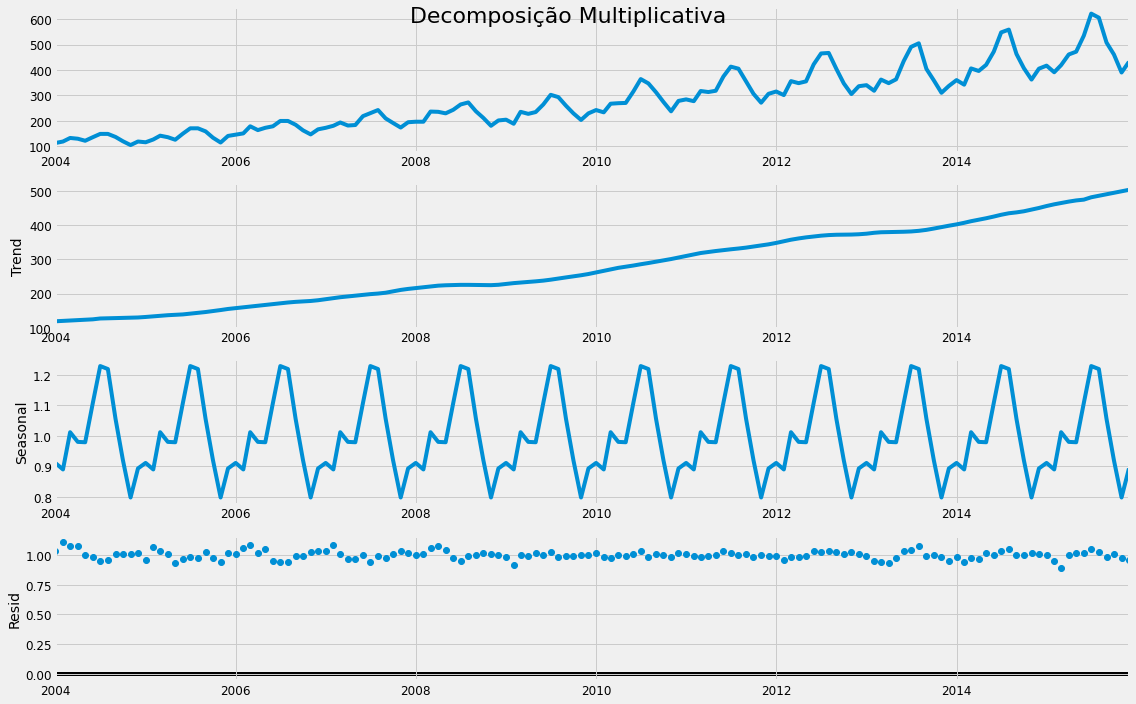

In [33]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

In [34]:
# Decomposição Aditiva
decomposicao_aditiva = sm.tsa.seasonal_decompose(dados_serie, 
                                                 model = 'aditive', 
                                                 extrapolate_trend = 'freq')

In [35]:
# Tipo do objeto
type(decomposicao_aditiva)

statsmodels.tsa.seasonal.DecomposeResult

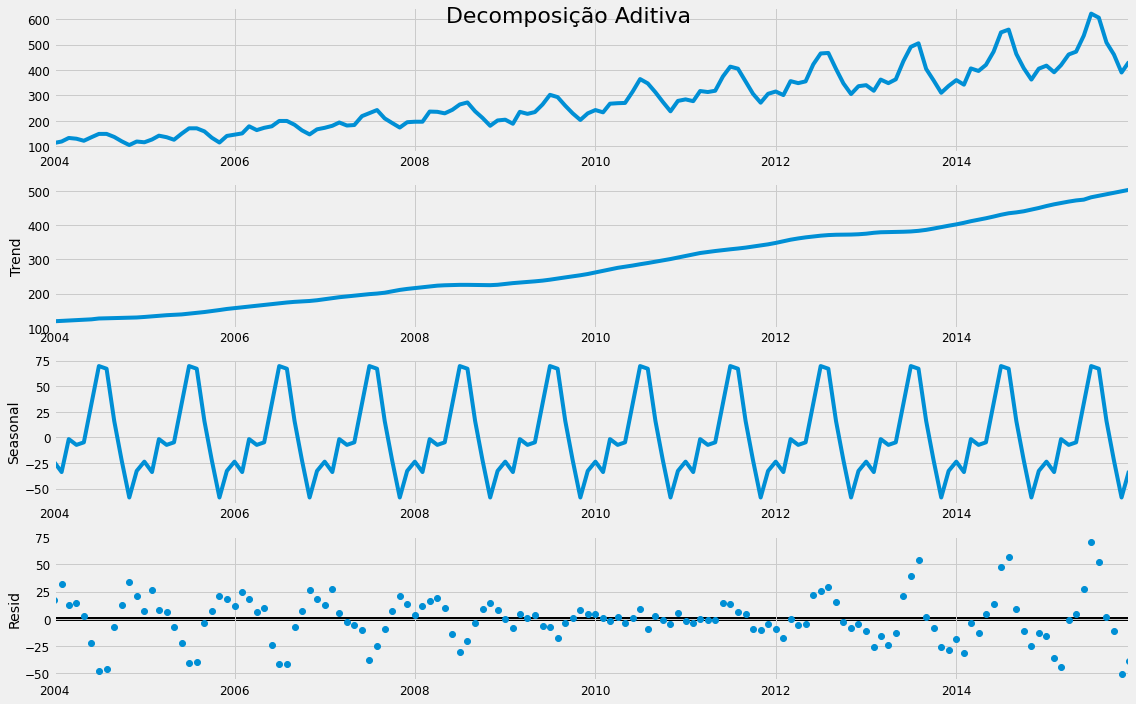

In [36]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

> Análise da Decomposição da Série - Quinta Análise de Tendência

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o valor do título.

2- A segunda linha mostra a tendência da série, que claramente é uma tendência de crescimento, ou seja, o valor do título tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos valores maiores ou menores do título. Isso talvez possa ser explicado por eventos socioeconômicos.

4- A quarta linha é o componete irregular ou resíduo.

Definir **extrapolate_trend = 'freq'** remove valores NaN na tendência e nos resíduos (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. 

Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

## Extração dos Componentes da Série Temporal

Regra de extração:

Valores reais = Produto de (sazonal * tendência * resíduo)

In [37]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

In [38]:
# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [39]:
# Mostra o resultado
dados_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
2004-01-01,0.911647,118.588481,1.035974,112.0
2004-02-01,0.890278,119.734169,1.106976,118.0
2004-03-01,1.012327,120.879856,1.078697,132.0
2004-04-01,0.980652,122.025544,1.078013,129.0
2004-05-01,0.979428,123.171232,1.003006,121.0


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

- Série na data 2004-01-01 = 112.0
- Série na data 2004-01-01 = Sazonalidade x Tendência x Resíduos = 0.911256 x 118.588481 x 1.036418 = 112.0

In [40]:
# Cálculo em Python
valor_observado = 0.911256 * 118.588481 * 1.036418
print(valor_observado)

111.9999565227569


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.

Concluímos assim a primeira parte do projeto. Vamos para a segunda parte.

# Fim da Parte 1